In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf

In [2]:
movie = pd.read_csv('./dataset/movies.csv')

In [3]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie.shape

(9742, 3)

In [5]:
movie['movieId'].nunique()

9742

In [6]:
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [7]:
ratings = pd.read_csv('./dataset/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
ratings.shape

(100836, 4)

In [9]:
ratings['movieId'].nunique()

9724

In [10]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [11]:
ratings = ratings.drop(columns=['userId'])

In [12]:
ratings.head()

,movieId,rating,timestamp
0,1,4.0,964982703
1,3,4.0,964981247
2,6,4.0,964982224
3,47,5.0,964983815
4,50,5.0,964982931


In [13]:
links = pd.read_csv('./dataset/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [14]:
links.shape

(9742, 3)

In [15]:
links['movieId'].nunique()

9742

In [16]:
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [17]:
tags = pd.read_csv('./dataset/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [18]:
tags.shape

(3683, 4)

In [19]:
tags['movieId'].nunique()

1572

In [20]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [21]:
dataset = movie.merge(ratings, on='movieId', how='inner')
dataset = dataset.merge(tags, on='movieId', how='inner')

In [22]:
dataset.head()

,movieId,title,genres,rating,timestamp_x,userId,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,847434962,474,pixar,1137206825


In [23]:
dataset.drop(columns=['timestamp_x', 'timestamp_y'], axis=1)

,movieId,title,genres,rating,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,336,pixar
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,474,pixar
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,567,fun
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,336,pixar
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,474,pixar
...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,5.0,62,star wars
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,3.5,184,anime
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,3.5,184,comedy
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,3.5,184,gintama


In [24]:
average_rating = dataset.groupby(by='title')['rating'].mean().to_frame().reset_index()

In [25]:
average_rating

,title,rating
0,(500) Days of Summer (2009),3.666667
1,...And Justice for All (1979),3.166667
2,10 Cloverfield Lane (2016),3.678571
3,10 Things I Hate About You (1999),3.527778
4,101 Dalmatians (1996),3.074468
...,...,...
1549,Zero Dark Thirty (2012),4.107143
1550,Zombieland (2009),3.877358
1551,Zoolander (2001),3.509259
1552,Zulu (1964),4.000000


In [26]:
dataset = dataset.merge(average_rating, on='title', how='inner')

In [27]:
dataset.shape

(233213, 9)

In [28]:
dataset.drop(columns=['timestamp_x', 'timestamp_y', 'rating_x'], axis=1, inplace=True)

In [29]:
dataset.rename(columns={'rating_y':'rating'}, inplace=True)

In [30]:
dataset[['genre_1','genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7']] = dataset['genres'].str.split('|', expand=True)

In [31]:
dataset.head()

,movieId,title,genres,userId,tag,rating,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093,Adventure,Animation,Children,Comedy,Fantasy,None,None
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093,Adventure,Animation,Children,Comedy,Fantasy,None,None
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,3.92093,Adventure,Animation,Children,Comedy,Fantasy,None,None
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093,Adventure,Animation,Children,Comedy,Fantasy,None,None
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093,Adventure,Animation,Children,Comedy,Fantasy,None,None


In [32]:
dataset.duplicated().sum()

229551

In [33]:
dataset.genre_1.unique()

array(['Adventure', 'Comedy', 'Drama', 'Crime', 'Mystery', 'Children',
       'Action', 'Documentary', 'Thriller', 'Animation', 'Romance',
       'Musical', 'Film-Noir', 'Horror', 'Sci-Fi', 'Fantasy', 'Western',
       '(no genres listed)'], dtype=object)

In [34]:
dataset.genre_2.unique()

array(['Animation', 'Children', 'Romance', None, 'Drama', 'Crime',
       'Sci-Fi', 'Comedy', 'War', 'Thriller', 'Mystery', 'Horror',
       'Adventure', 'Musical', 'Film-Noir', 'Fantasy', 'Western', 'IMAX',
       'Documentary'], dtype=object)

In [35]:
dataset.genre_3.unique()

array(['Children', 'Fantasy', None, 'Romance', 'Thriller', 'Horror',
       'Crime', 'Comedy', 'War', 'IMAX', 'Mystery', 'Sci-Fi', 'Drama',
       'Western', 'Musical', 'Film-Noir', 'Animation'], dtype=object)

In [36]:
all_genre = []
for i in dataset.genre_1.unique():
    all_genre.append(i)
print(all_genre)

['Adventure', 'Comedy', 'Drama', 'Crime', 'Mystery', 'Children', 'Action', 'Documentary', 'Thriller', 'Animation', 'Romance', 'Musical', 'Film-Noir', 'Horror', 'Sci-Fi', 'Fantasy', 'Western', '(no genres listed)']


In [37]:
for i in dataset.genre_2.unique():
    all_genre.append(i)

In [38]:
for i in dataset.genre_3.unique():
    all_genre.append(i)

In [39]:
for i in dataset.genre_4.unique():
    all_genre.append(i)

In [40]:
for i in dataset.genre_5.unique():
    all_genre.append(i)

In [41]:
for i in dataset.genre_6.unique():
    all_genre.append(i)

In [42]:
for i in dataset.genre_7.unique():
    all_genre.append(i)

In [43]:
print(all_genre)

['Adventure', 'Comedy', 'Drama', 'Crime', 'Mystery', 'Children', 'Action', 'Documentary', 'Thriller', 'Animation', 'Romance', 'Musical', 'Film-Noir', 'Horror', 'Sci-Fi', 'Fantasy', 'Western', '(no genres listed)', 'Animation', 'Children', 'Romance', None, 'Drama', 'Crime', 'Sci-Fi', 'Comedy', 'War', 'Thriller', 'Mystery', 'Horror', 'Adventure', 'Musical', 'Film-Noir', 'Fantasy', 'Western', 'IMAX', 'Documentary', 'Children', 'Fantasy', None, 'Romance', 'Thriller', 'Horror', 'Crime', 'Comedy', 'War', 'IMAX', 'Mystery', 'Sci-Fi', 'Drama', 'Western', 'Musical', 'Film-Noir', 'Animation', 'Comedy', None, 'Mystery', 'Romance', 'Musical', 'Crime', 'Sci-Fi', 'Thriller', 'War', 'Drama', 'Fantasy', 'Western', 'Horror', 'IMAX', 'Children', 'Fantasy', None, 'Thriller', 'Sci-Fi', 'Musical', 'Romance', 'Crime', 'War', 'Mystery', 'Comedy', 'IMAX', None, 'IMAX', 'Sci-Fi', 'Fantasy', 'Romance', 'War', 'Thriller', None, 'Mystery', 'IMAX']


In [44]:
fix_genre = set(all_genre)
print(fix_genre)

{'Drama', 'Children', 'Animation', 'Action', None, 'Fantasy', 'Thriller', 'Horror', '(no genres listed)', 'Crime', 'Documentary', 'Film-Noir', 'War', 'Romance', 'Comedy', 'Mystery', 'Musical', 'Sci-Fi', 'IMAX', 'Western', 'Adventure'}


In [45]:
dataset = dataset.drop(columns=['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7'], axis=1)

In [46]:
dataset.head()

,movieId,title,genres,userId,tag,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,3.92093
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093


In [47]:
dataset['action'] = dataset['genres'].apply(lambda x: 1 if 'Action' in x else 0 )
dataset['film-noir'] = dataset['genres'].apply(lambda x: 1 if 'Film-Noir' in x else 0 )
dataset['imax'] = dataset['genres'].apply(lambda x: 1 if 'IMAX' in x else 0 )
dataset['crime'] = dataset['genres'].apply(lambda x: 1 if 'Crime' in x else 0 )
dataset['fantasy'] = dataset['genres'].apply(lambda x: 1 if 'Fantasy' in x else 0 )
dataset['children'] = dataset['genres'].apply(lambda x: 1 if 'Children' in x else 0 )
dataset['comedy'] = dataset['genres'].apply(lambda x: 1 if 'Comedy' in x else 0 )
dataset['musical'] = dataset['genres'].apply(lambda x: 1 if 'Musical' in x else 0 )
dataset['horror'] = dataset['genres'].apply(lambda x: 1 if 'Horror' in x else 0 )
dataset['animation'] = dataset['genres'].apply(lambda x: 1 if 'Animation' in x else 0 )
dataset['adventure'] = dataset['genres'].apply(lambda x: 1 if 'Adventure' in x else 0 )
dataset['mystery'] = dataset['genres'].apply(lambda x: 1 if 'Mystery' in x else 0 )
dataset['romance'] = dataset['genres'].apply(lambda x: 1 if 'Romance' in x else 0 )
dataset['documentary'] = dataset['genres'].apply(lambda x: 1 if 'Documentary' in x else 0 )
dataset['thriller'] = dataset['genres'].apply(lambda x: 1 if 'Thriller' in x else 0 )
dataset['war'] = dataset['genres'].apply(lambda x: 1 if 'War' in x else 0 )
dataset['sci-fi'] = dataset['genres'].apply(lambda x: 1 if 'Sci-Fi' in x else 0 )
dataset['drama'] = dataset['genres'].apply(lambda x: 1 if 'Drama' in x else 0 )
dataset['western'] = dataset['genres'].apply(lambda x: 1 if 'Western' in x else 0 )

In [48]:
dataset.head()

,movieId,title,genres,userId,tag,rating,action,film-noir,imax,crime,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [49]:
dataset.head()

,movieId,title,genres,userId,tag,rating,action,film-noir,imax,crime,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,3.92093,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [50]:
df = dataset.copy()

In [51]:
df.drop(columns=['movieId', 'userId', 'tag'], axis=1, inplace=True)

In [52]:
df.head()

,title,genres,rating,action,film-noir,imax,crime,fantasy,children,comedy,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
2,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
3,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
4,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0


In [53]:
df.shape

(233213, 22)

In [54]:
df.duplicated().sum()

231659

In [55]:
df.drop_duplicates(inplace=True)

In [56]:
df.reset_index(drop=True, inplace=True)

In [57]:
df.head()

,title,genres,rating,action,film-noir,imax,crime,fantasy,children,comedy,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
1,Jumanji (1995),Adventure|Children|Fantasy,3.431818,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,Grumpier Old Men (1995),Comedy|Romance,3.259615,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,Father of the Bride Part II (1995),Comedy,3.071429,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Sabrina (1995),Comedy|Romance,3.185185,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [58]:
df['rating'].min()

0.5

In [59]:
df.shape

(1554, 22)

In [60]:
def num_rounded(x):
    if x >= 4.25:
        return 5.0
    elif x >= 4.0 and x < 4.25:
        return 4.5
    elif x >= 3.25 and x < 4.0:
        return 4.0
    elif x >= 3.0 and x < 3.25:
        return 3.5
    elif x >= 2.25 and x < 3.0:
        return 3.0
    elif x >= 2.0 and x < 2.25:
        return 2.5
    elif x >= 1.25 and x < 2.0:
        return 2.0
    elif x >= 1 and x < 1.25:
        return 1.5
    elif x >= 0.25 and x < 1:
        return 1.0
    else:
        return 0.5

In [61]:
df['rating'] = df['rating'].apply(lambda x: num_rounded(x))

In [62]:
df.head()

,title,genres,rating,action,film-noir,imax,crime,fantasy,children,comedy,...,animation,adventure,mystery,romance,documentary,thriller,war,sci-fi,drama,western
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
1,Jumanji (1995),Adventure|Children|Fantasy,4.0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
2,Grumpier Old Men (1995),Comedy|Romance,4.0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,Father of the Bride Part II (1995),Comedy,3.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Sabrina (1995),Comedy|Romance,3.5,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [63]:
df.rating.value_counts().sort_values(ascending=False)

4.0    838
4.5    322
5.0    132
3.5    121
3.0    114
2.5     16
2.0      8
1.5      2
1.0      1
Name: rating, dtype: int64

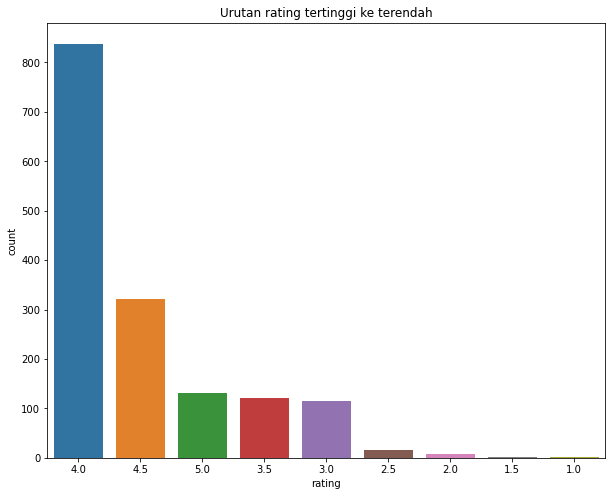

In [64]:
plt.figure(figsize=(10, 8))

sns.countplot(x=df.rating, order=df['rating'].value_counts().index)

plt.title('Urutan rating tertinggi ke terendah')

plt.show()

In [65]:
X = df.drop(columns=['title', 'genres', 'rating'])
y = df['rating']

In [66]:
y

0       4.0
1       4.0
2       4.0
3       3.5
4       3.5
       ... 
1549    4.5
1550    3.0
1551    4.0
1552    4.0
1553    4.0
Name: rating, Length: 1554, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)